In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### PCA to transformed features

In [4]:
data = pd.read_csv("food-consumption.csv", index_col="Country")
# Remove "Sweden", "Finland", and "Spain"
data.drop(["Sweden", "Finland", "Spain"], axis=0, inplace=True)


std_features = np.std(data.values, axis=0)
normalized_data = pd.DataFrame(np.matmul(data.values, np.diag(1 / std_features)),
                                         columns=data.columns, index=data.index)

mu = np.mean(normalized_data, axis=0)

u_norm_data = normalized_data.values - mu.values


C = np.matmul(u_norm_data.T, u_norm_data) / u_norm_data.shape[0]
lambdas, eigen_vals = np.linalg.eigh(C)

eigen_vals = eigen_vals[:, np.argsort(-lambdas)]
lambdas = lambdas[np.argsort(-lambdas)]

principals = eigen_vals[:,0:2]
transformed_data = np.matmul(principals.T, u_norm_data.T).T / np.sqrt(lambdas[0:2])
transformed_features = np.matmul(u_norm_data, eigen_vals.T)

## 3.1 Plotting the first two pricinpal directions

Text(0, 0.5, 'PC2')

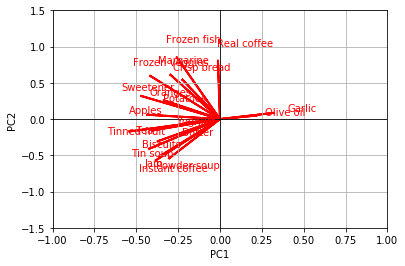

In [6]:
%matplotlib inline
# Compute the principle directions for each feature
directions = np.zeros((transformed_features.shape[1], 2))
for i in range(transformed_features.shape[1]):
    directions[i, 0] = eigen_vals[i ,0] * max(transformed_features[:,0])
    directions[i, 1] = eigen_vals[i ,1] * max(transformed_features[:,1]) 

# Plot the axis
plt.plot((-2, 2), (0, 0), 'k-', linewidth=0.8)
plt.plot((0, 0), (-2, 2), 'k-', linewidth=0.8)

# Show all of the principle directions scaled by the maximum value of the transformed feature
for i in range(transformed_features.shape[1]):
    plt.arrow(0, 0, directions[i, 0], directions[i, 1], color='r', linewidth=2)
    plt.text(directions[i, 0] * 1.25, directions[i, 1] * 1.25, data.columns.values[i], color='r')
    
plt.xlim([-1, 1])
plt.ylim([-1.5, 1.5])
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')

Olive Oil and Garlic stand out in PC1 and Real Coffee is part of PC2

## Compute the Reduced Representation of the Data points

In [13]:
%matplotlib inline
def plot_helper(c, title, cmap=cm.winter, colorbar=True):
    # Plot the axis
    plt.plot((-2, 2), (0, 0), 'k-', linewidth=0.8)
    plt.plot((0, 0), (-2, 2), 'k-', linewidth=0.8)

    plt.scatter(transformed_data[:,0], transformed_data[:,1], c=c, cmap=cmap)
    for i in range(transformed_data.shape[0]):
        plt.text(transformed_data[i,0] * 1.01, transformed_data[i,1] * 1.01, data.index[i])

    for i in (0, 12, 14):
        plt.arrow(0, 0, directions[i, 0], directions[i, 1], color='r', linewidth=2)
        plt.text(directions[i, 0] * 1.25, directions[i, 1] * 1.25, data.columns.values[i], color='r')

    plt.grid()
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(title)
    if colorbar:
        plt.colorbar()

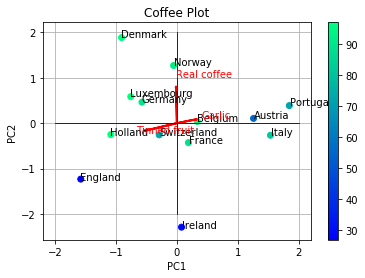

In [14]:
plot_helper(data["Real coffee"].values, 'Coffee Plot')

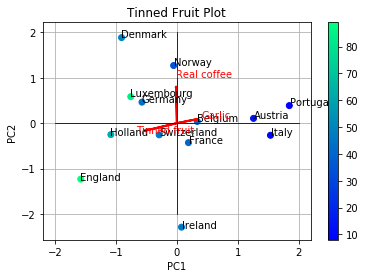

In [15]:
plot_helper(data["Tinned fruit"].values, 'Tinned Fruit Plot')

In the reduced representation plots Coffee and Tinned Fruit stand out with similar colors. Garlic and Olive Oil are also acceptable answers. 